In [274]:
# load thu vien
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [275]:
# create dataset 5000 dataset, mỗi image có size= (8,8), bbox có kích thước 1-4 theo width và height
# image có background màu trắng, bbox màu đen
np.random.seed(10)
number_data = 5000
img_size = 8
min_size_obj = 1
max_size_obj = 4
number_obj = 1
# x là dataset image, y là label với 4 tham số(x,y,w.h)
bboxes = np.zeros((5000,1,4))
image = np.zeros((5000,img_size,img_size))
for i in range(5000):
    for obj in range(number_obj):
        w,h = np.random.randint(min_size_obj,max_size_obj,size = 2)
        x = np.random.randint(0,img_size-w)
        y = np.random.randint(0,img_size-h)
        bboxes[i,:,:] = (x,y,w,h)
        image[i,y:y+h,x:x+w] = 1

In [276]:
print(image.shape,bbox.shape,sep=" ")

(5000, 8, 8) (4,)


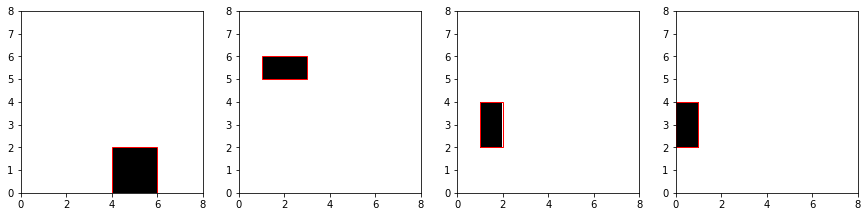

In [277]:
plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(image[i],cmap="Greys",interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
    for bbox in bboxes[i]:
        plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r', fc='none'))

In [278]:
from sklearn.model_selection import train_test_split

In [290]:
X = image.reshape((5000,-1))
y = bboxes.reshape((5000,-1))

In [291]:
# split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [292]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

In [293]:
#build model
model = Sequential()
model.add(Dense(300,input_dim =64))
model.add(Dense(100))
model.add(Dropout(0.2))
model.add(Activation("relu"))
model.add(Dense(4))
model.compile(optimizer="adadelta",loss="mse")

In [294]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 300)               19500     
_________________________________________________________________
dense_43 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
activation_14 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 4)                 404       
Total params: 50,004
Trainable params: 50,004
Non-trainable params: 0
_________________________________________________________________


In [295]:
model.fit(X_train,y_train,epochs=50,batch_size=200)

Epoch 1/50
3500/3500 [==============================] - 0s - loss: 5.6825     
Epoch 2/50
3500/3500 [==============================] - 0s - loss: 2.4551     
Epoch 3/50
3500/3500 [==============================] - 0s - loss: 1.5402     
Epoch 4/50
3500/3500 [==============================] - 0s - loss: 1.2739     
Epoch 5/50
3500/3500 [==============================] - 0s - loss: 1.0670     
Epoch 6/50
3500/3500 [==============================] - 0s - loss: 0.9027     
Epoch 7/50
3500/3500 [==============================] - 0s - loss: 0.7863     
Epoch 8/50
3500/3500 [==============================] - 0s - loss: 0.6900     
Epoch 9/50
3500/3500 [==============================] - 0s - loss: 0.6178     
Epoch 10/50
3500/3500 [==============================] - 0s - loss: 0.5769     
Epoch 11/50
3500/3500 [==============================] - 0s - loss: 0.5376     
Epoch 12/50
3500/3500 [==============================] - 0s - loss: 0.5002     
Epoch 13/50
3500/3500 [==========================

In [296]:
y_predict = model.predict(X_test)

In [297]:
#dùng IOU để đánh giá kết quả model
def overlaping_area(detection_1,detection_2):
    #detection_1,detection_2 format [x_left_top,y_left_top,width,height]
    x_1 = detection_1[0]
    y_1 = detection_1[1]
    x_w_1 = detection_1[0] + detection_1[2]
    y_h_1 = detection_1[1] + detection_1[3]
    
    x_2 = detection_2[0]
    y_2 = detection_2[1]
    x_w_2 = detection_2[0] + detection_2[2]
    y_h_2 = detection_2[1] + detection_2[3]
    # tính overlap theo ox,oy .Nếu ko giao nhau trả về 0
    overlap_x = max(0,min(x_w_1,x_w_2) - max(x_1,x_2))
    overlap_y = max(0,min(y_h_1,y_h_2) - max(y_1,y_2))
    # tính area overlap
    overlap_area = overlap_x*overlap_y
    # tính total area hợp của 2 detection
    total_area = detection_1[2]*detection_1[3] + detection_2[2]*detection_2[3] - overlap_area
    
    return np.round(overlap_area/float(total_area),3)

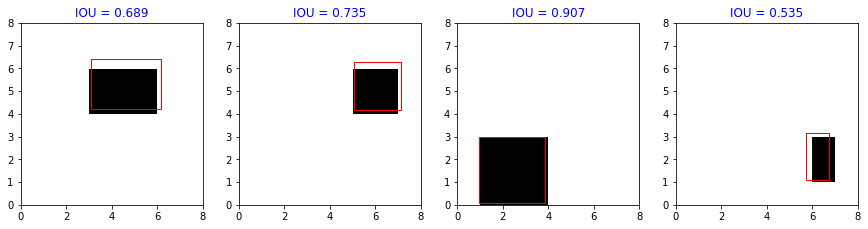

In [298]:
X_test_image = X_test.reshape((-1,8,8))
bbox_y = y_predict.reshape((-1,1,4))
bbx_y_true = y_test.reshape((-1,1,4))
plt.figure(figsize=(15,15))
for i in range(4):
    iou = overlaping_area(bbox_y[i].flatten(),bbx_y_true[i].flatten())
    plt.subplot(1,4,i+1)
    plt.imshow(X_test_image[i],cmap="Greys",interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
    for bbox in bbox_y[i]:
        plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r', fc='none'))
        plt.title("IOU = "+str(iou),color='blue')

In [299]:
IOU = []
for i in range(len(X_test)):
    iou = overlaping_area(bbox_y[i].flatten(),bbx_y_true[i].flatten())
    IOU.append(iou)

In [300]:
np.mean(IOU)

0.72560466666666679